## **Summarizing a population**
### **Example of summarizing numerical attributes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

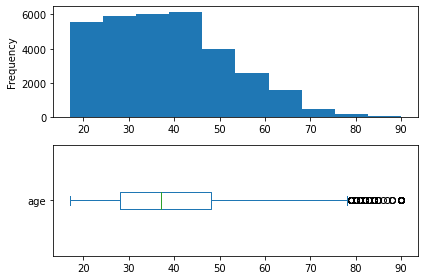

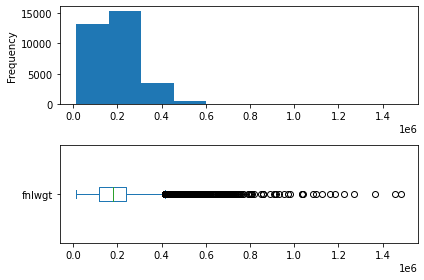

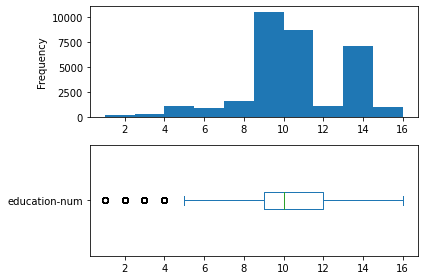

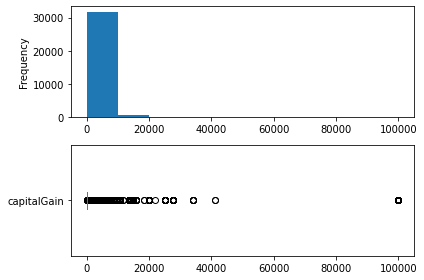

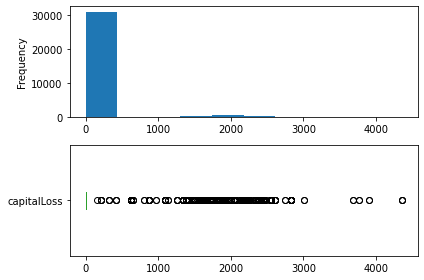

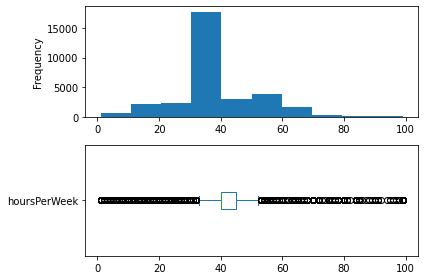

In [2]:
adult_df = pd.read_csv('adult.csv')

numerical_attributes = ['age', 'fnlwgt', 'education-num', 'capitalGain', 'capitalLoss',
       'hoursPerWeek']

for att in numerical_attributes:
    plt.subplot(2,1,1)
    adult_df[att].plot.hist()
    plt.subplot(2,1,2)
    adult_df[att].plot.box(vert=False)
    plt.tight_layout()
    plt.savefig('{}.png'.format(att), dpi=600)
    plt.show()

### **Example of summarizing categorical attributes**

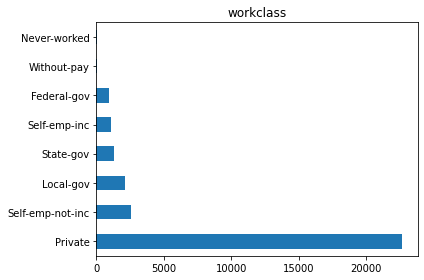

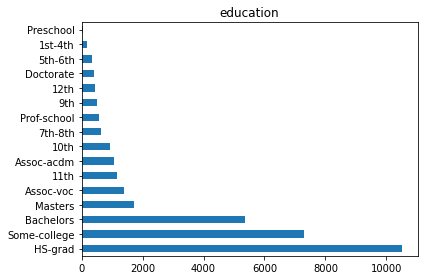

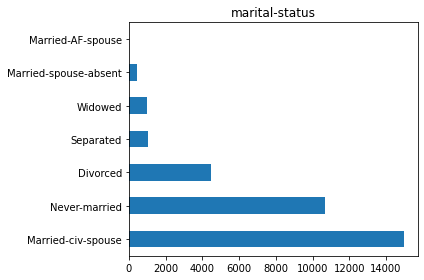

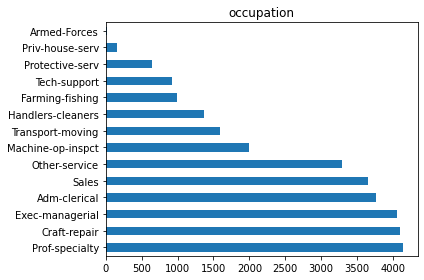

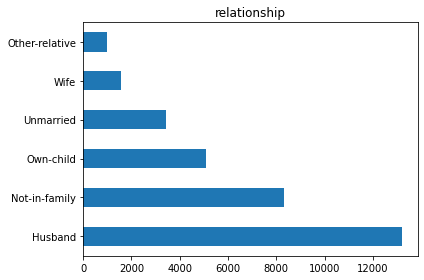

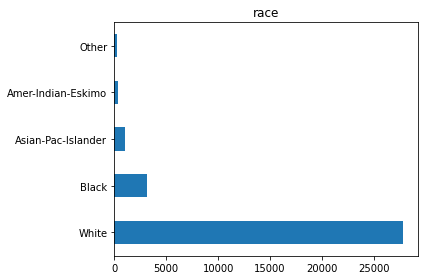

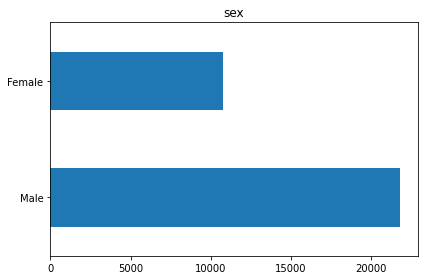

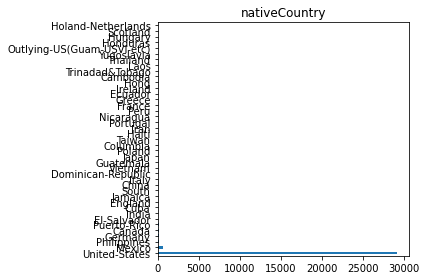

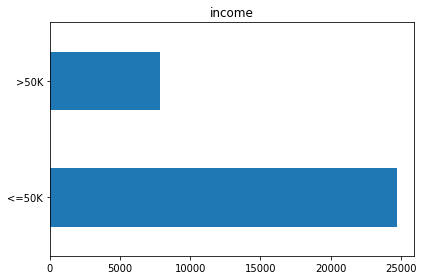

In [3]:
categorical_attributes = ['workclass', 'education', 'marital-status', 
                          'occupation', 'relationship', 'race',
                         'sex','nativeCountry','income']

for att in categorical_attributes:
    adult_df[att].value_counts().plot.barh()
    plt.title(att)
    plt.tight_layout()
    plt.savefig('{}.png'.format(att), dpi=600)
    plt.show()

## **Comparing populations**
### **Example of comparing populations using boxplots**

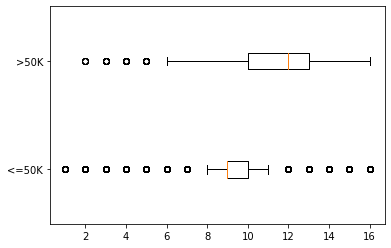

In [4]:
income_possibilities = adult_df.income.unique()

box_sr = pd.Series('',index = income_possibilities)

for poss in income_possibilities:
    BM = adult_df.income == poss
    box_sr[poss] = adult_df[BM]['education-num']
    
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],income_possibilities)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


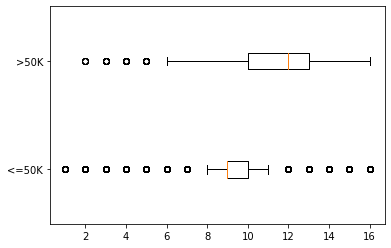

In [5]:
income_possibilities = adult_df.income.unique()

dataForBox_dic= {}

for poss in income_possibilities:
    BM = adult_df.income == poss
    dataForBox_dic[poss] = adult_df[BM]['education-num']
    
plt.boxplot(dataForBox_dic.values(),vert=False)
plt.yticks([1,2],income_possibilities)
plt.show()

### **Example of comparing populations using histograms**

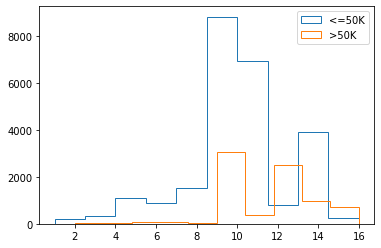

In [6]:
income_possibilities = adult_df.income.unique()

for poss in income_possibilities:
    BM = adult_df.income == poss
    plt.hist(adult_df[BM]['education-num'],
             histtype='step',label=poss)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


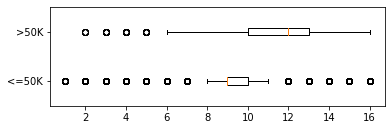

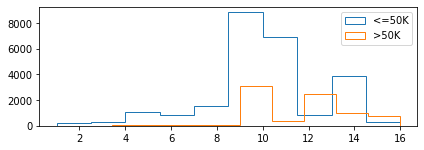

In [7]:
income_possibilities = adult_df.income.unique()

dataForBox_dic= {}

for poss in income_possibilities:
    BM = adult_df.income == poss
    dataForBox_dic[poss] = adult_df[BM]['education-num']

plt.subplot(2,1,1)
plt.boxplot(dataForBox_dic.values(),vert=False)
plt.yticks([1,2],income_possibilities)
plt.show()

plt.subplot(2,1,2)

for poss in income_possibilities:
    BM = adult_df.income == poss
    plt.hist(adult_df[BM]['education-num'],
             histtype='step',label=poss)
plt.legend()
plt.tight_layout()
plt.show()

### **Example of comparing populations using bar charts**
#### **The first way of solving**

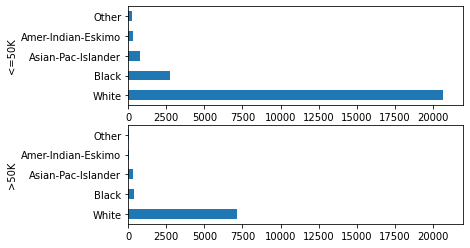

In [8]:
income_possibilities = adult_df.income.unique()

for i,poss in enumerate(income_possibilities):
    plt.subplot(2,1,i+1)
    BM = adult_df.income == poss
    adult_df[BM].race.value_counts().plot.barh()
    plt.xlim([0,22000])
    plt.ylabel(poss)

#### **The second way of solving**

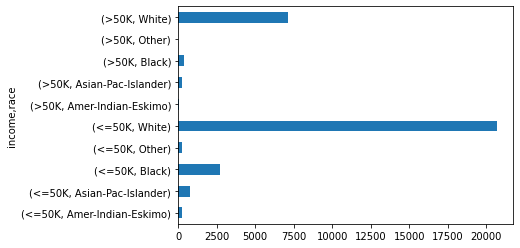

In [9]:
adult_df.groupby(['income','race']).size().plot.barh()
plt.show()

#### **The third way of solving**

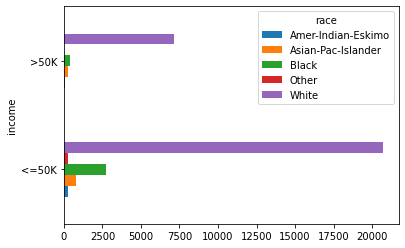

In [10]:
adult_df.groupby(['income','race']).size().unstack().plot.barh()
plt.show()

#### **The fourth way of solving**

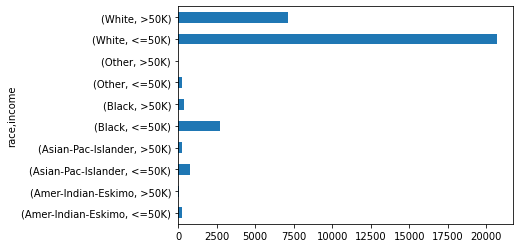

In [11]:
adult_df.groupby(['race','income']).size().plot.barh()
plt.show()

#### **The fifth way of solving**

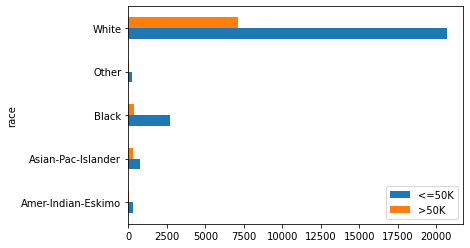

In [12]:
adult_df.groupby(['race','income']).size().unstack().plot.barh()
plt.legend(loc=4)
plt.show()

#### **The sixth way of solving**

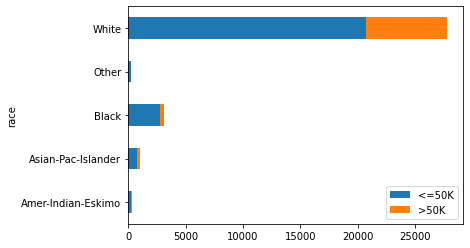

In [13]:
adult_df.groupby(['race','income']).size().unstack().plot.barh(stacked=True)
plt.legend(loc=4)

## **Investigating the relationship between two attributes**

### **Visualizing the relationship between two numerical attributes**
#### **Example of using scatterplots to investigate between the numerical attributes**

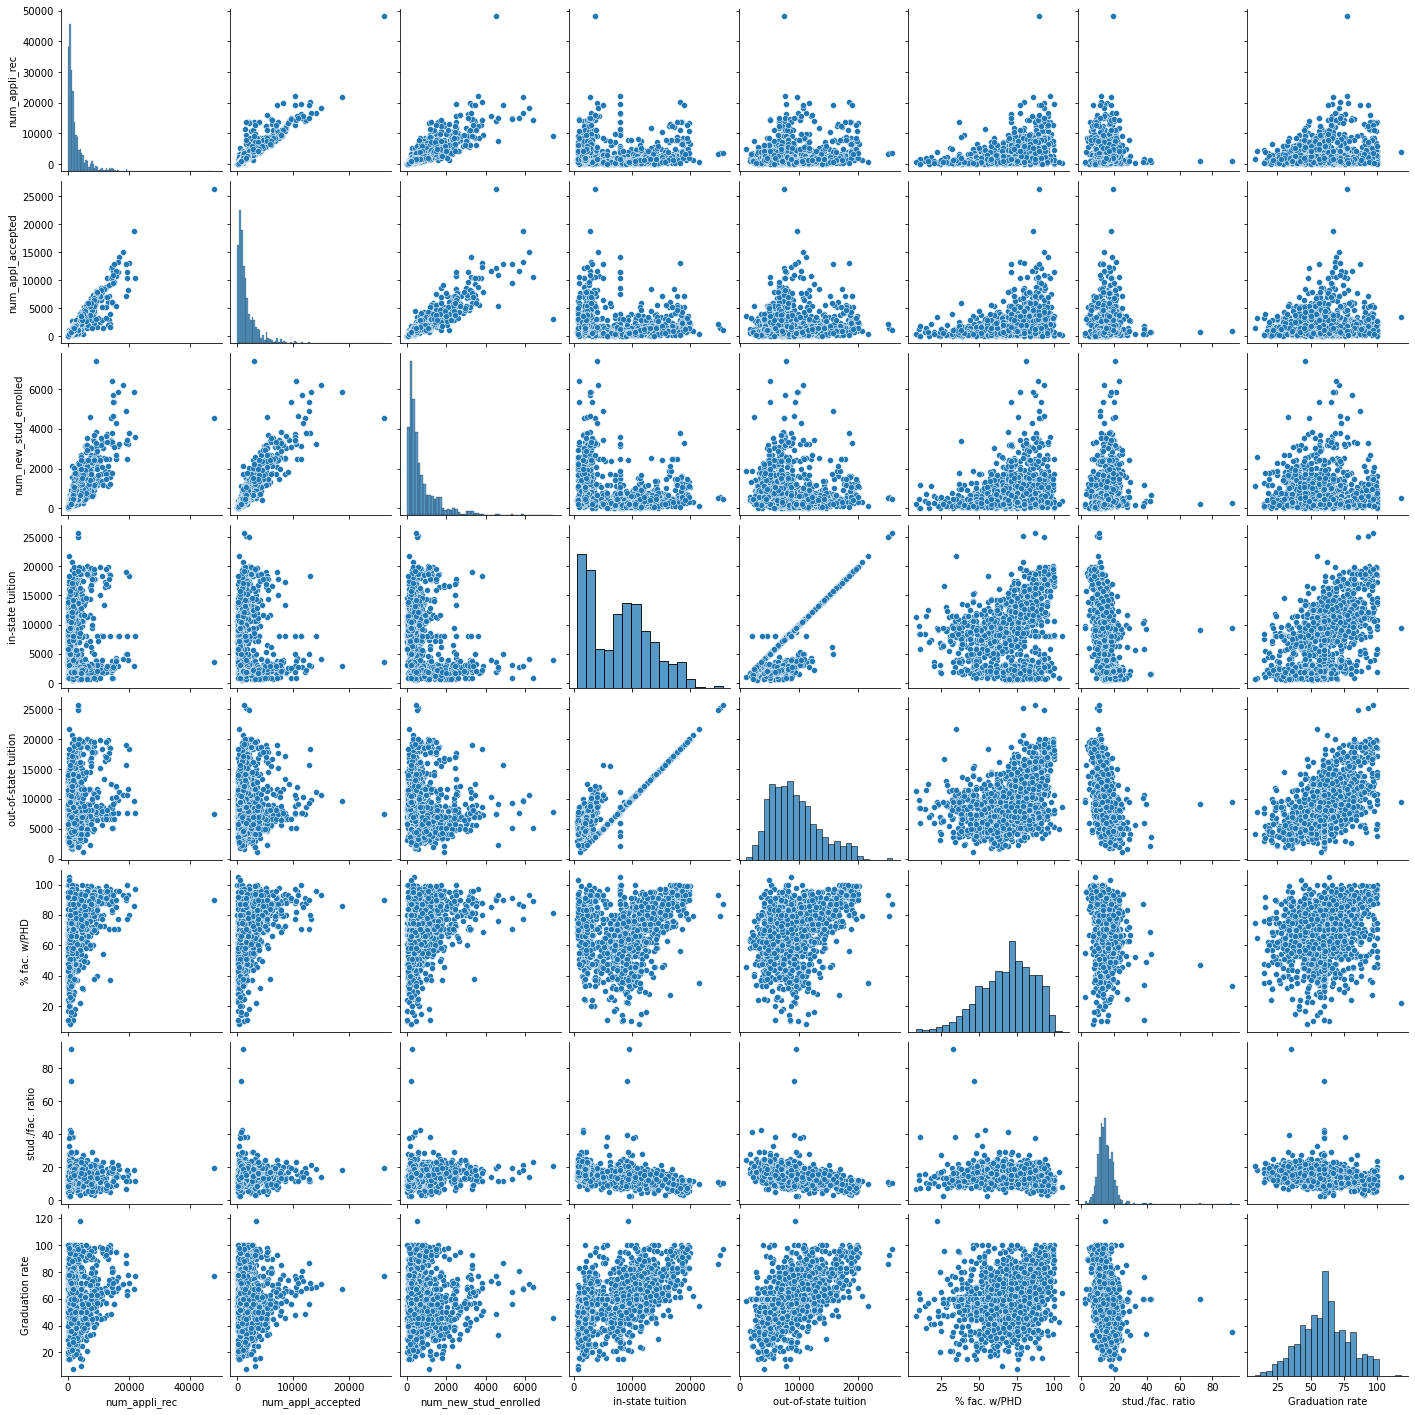

In [14]:
import seaborn as sns
uni_df = pd.read_csv('Universities_imputed_reduced.csv')
sns.pairplot(uni_df)
plt.show()

### **Visualizing the relationship between two categorical attributes**
#### **Example of using contingency table to examine the relationship between two categorical (binary) attributes**

In [15]:
contingency_tbl = pd.crosstab(adult_df.income,adult_df.sex)
contingency_tbl

sex,Female,Male
income,,
<=50K,9592,15128
>50K,1179,6662


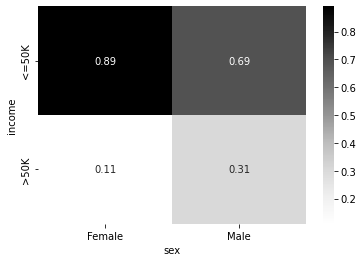

In [16]:
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="Greys")
plt.show()

#### **Example of using contingency table to relationship between two categorical (non-binary) attributes**

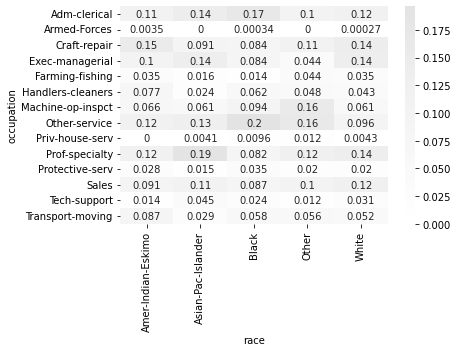

In [17]:
contingency_tbl = pd.crosstab(adult_df.occupation,adult_df.race)
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="Greys")
plt.show()

### **Visualizing the relationship between a numerical attribute and a categorical attribute**
#### **Visualizing the relationship between a numerical attribute and a categorical attribute**

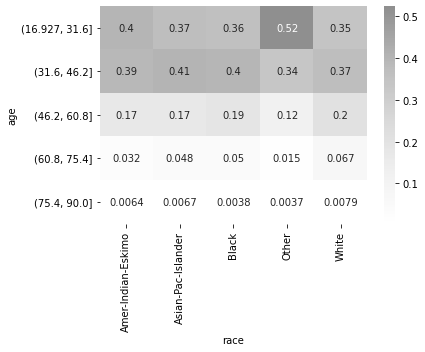

In [18]:
age_discretized = pd.cut(adult_df.age, bins = 5)
contingency_tbl = pd.crosstab(age_discretized,adult_df.race)
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="Greys")
plt.show()

#### **Another example of examining the relationship between a categorical attribute and a numerical attribute**

In [19]:
pd.DataFrame(adult_df.groupby(['education','education-num']).size()).drop(columns=[0]).reset_index().sort_values('education-num').reset_index(drop=True).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
education,Preschool,1st-4th,5th-6th,7th-8th,9th,10th,11th,12th,HS-grad,Some-college,Assoc-voc,Assoc-acdm,Bachelors,Masters,Prof-school,Doctorate
education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16


In [20]:
adult_df.groupby(['education','education-num']).size()

education     education-num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  168
5th-6th       3                  333
7th-8th       4                  646
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5355
Doctorate     16                 413
HS-grad       9                10501
Masters       14                1723
Preschool     1                   51
Prof-school   15                 576
Some-college  10                7291
dtype: int64

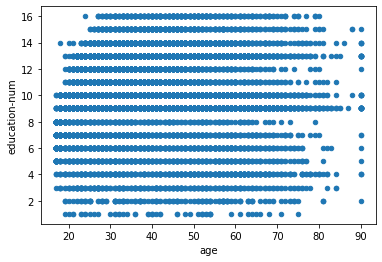

In [21]:
adult_df.plot.scatter(x='age',y='education-num')
plt.show()

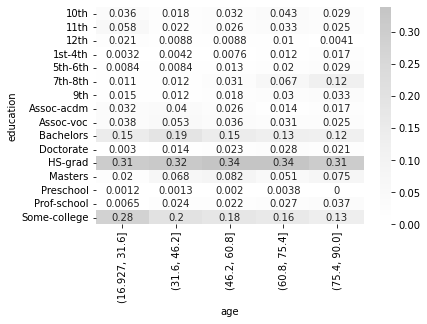

In [22]:
age_discretized = pd.cut(adult_df['age'], bins = 5)
contingency_tbl = pd.crosstab(adult_df.education,age_discretized)
probablity_tbl = contingency_tbl/ contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot=True, center=0.5 ,cmap="Greys")
plt.show()

## **Adding visual dimensions**
### **Example of a 5-dimensional scatterplot**

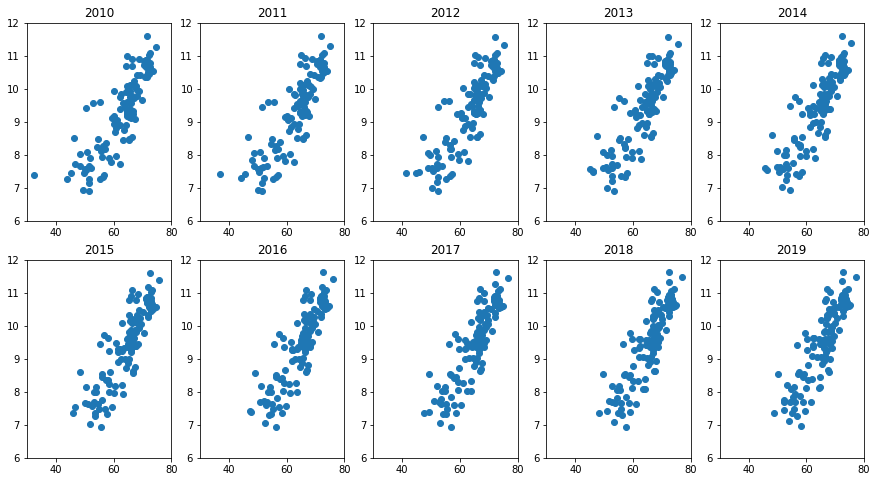

<Figure size 432x288 with 0 Axes>

In [23]:
country_df = pd.read_csv('WH Report_preprocessed.csv')
plt.figure(figsize=(15,8)) 

year_poss = country_df.year.unique()

for i,yr in enumerate(year_poss):
    BM = country_df.year == yr
    X= country_df[BM].Healthy_life_expectancy_at_birth
    Y= country_df[BM].Log_GDP_per_capita
    
    plt.subplot(2,5,i+1)
    plt.scatter(X,Y)
    plt.title(yr)
    plt.xlim([30,80])
    plt.ylim([6,12])

plt.show()
plt.tight_layout()

In [24]:
def plotyear(year):
    BM = country_df.year == year
    X= country_df[BM].Healthy_life_expectancy_at_birth
    Y= country_df[BM].Log_GDP_per_capita

    plt.scatter(X,Y)
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.show()

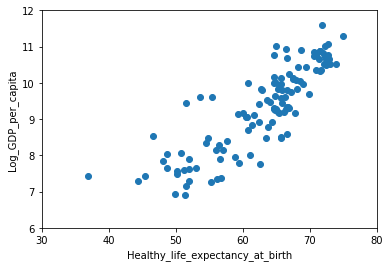

In [25]:
plotyear(2011)

In [26]:
from ipywidgets import interact, widgets
interact(plotyear,year=widgets.IntSlider(min=2010,max=2019,step=1,value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear>

#### **The fourth dimension**

In [27]:
Continent_poss = country_df.Continent.unique()
colors_dic={'Asia':'b', 'Europe':'g', 'Africa':'r', 'South America':'c',
            'Oceania':'m', 'North America':'y', 'Antarctica':'k'}

def plotyear(year):
    for cotinent in Continent_poss:
        BM1 = (country_df.year == year)
        BM2 = (country_df.Continent ==cotinent)
        BM = BM1 & BM2
        X = country_df[BM].Healthy_life_expectancy_at_birth
        Y= country_df[BM].Log_GDP_per_capita
        plt.scatter(X,Y,c=colors_dic[cotinent], marker='o',
                    linewidths=0.5,edgecolors='w',label=cotinent)
        
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.legend(ncol=1)
    plt.show()

interact(plotyear,year=widgets.IntSlider(min=2010,max=2019,step=1,value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear>

#### **The fifth dimension**

In [28]:
Continent_poss = country_df.Continent.unique()
colors_dic={'Asia':'b', 'Europe':'g', 'Africa':'r', 'South America':'c',
            'Oceania':'m', 'North America':'y', 'Antarctica':'k'}
country_df.sort_values(['population'],inplace = True, ascending=False)

def plotyear(year):
    for cotinent in Continent_poss:
        BM1 = (country_df.year == year)
        BM2 = (country_df.Continent ==cotinent)
        BM = BM1 & BM2
        size = country_df[BM].population/200000
        X = country_df[BM].Healthy_life_expectancy_at_birth
        Y= country_df[BM].Log_GDP_per_capita
        plt.scatter(X,Y,c=colors_dic[cotinent], marker='o', s=size,
                    linewidths=0.5,edgecolors='w',label=cotinent)
        
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.legend(markerscale=0.5)
    plt.show()

interact(plotyear,year=widgets.IntSlider(min=2010,max=2019,step=1,value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear>

## **Showing and comparing Trends**

In [29]:
amazon_df = pd.read_csv('Amazon Stock.csv')
apple_df = pd.read_csv('Apple Stock.csv')
show_table = amazon_df.iloc[5031:5041][['Date','Close']]
show_table.columns = ['Date','Amazon']
show_table = show_table.join(apple_df.iloc[5031:5041]['Close'])
show_table.columns = ['Date','Amazon','Apple']
show_table = show_table.transpose()
show_table.columns = show_table.loc['Date']
show_table.drop(index=['Date'])

Date,1/2/2020,1/3/2020,1/6/2020,1/7/2020,1/8/2020,1/9/2020,1/10/2020,1/13/2020,1/14/2020,1/15/2020
Amazon,1898.01001,1874.969971,1902.880005,1906.859985,1891.969971,1901.050049,1883.160034,1891.300049,1869.439941,1862.02002
Apple,74.333511,73.61084,74.197395,73.848442,75.036385,76.630219,76.803459,78.444321,77.385063,77.053429


### **Example of visualizing and comparing trends**

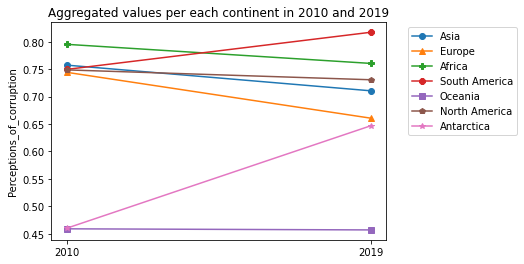

In [30]:
country_df = pd.read_csv('WH Report_preprocessed.csv')
continent_poss = country_df.Continent.unique()
byContinentYear_df = country_df.groupby(['Continent','year']).Perceptions_of_corruption.mean()
Markers_options = ['o', '^','P', '8', 's', 'p', '*']

for i,c in enumerate(continent_poss):
    plt.plot([2010,2019],byContinentYear_df.loc[c,[2010,2019]],
             label=c,marker=Markers_options[i])
plt.xticks([2010,2019])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Aggregated values per each continent in 2010 and 2019')
plt.ylabel('Perceptions_of_corruption')
plt.show()